### BURGER AND SHAKELAND_PROJECT

#### PROBLEM STATEMENT 
- What is the most popular item at Burgers & Shakeland
- Which location is the busiest? Does the answer to this question change throughout the day?
- A combo meal consists of 1 Burger, 1 Fry, and either a drink or a shake. How many Combo meals were sold from the State Street location in April?

- Bonus: some of the employees have been complaining about working long hours. Based only on the transaction data, can you tell if any employees are working more than a typical 8 hour shift?


### TASK 1. LOADING AND UNDERSTANDING THE DATASET

In [156]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import datetime

In [158]:
sales_data = pd.read_csv('C:\\Users\\Hazrat\\OneDrive\\Documents\\burgers_shakeland.csv')
sales_data

,Date,Time,Location,ItemID,Transaction EmployeeID,Employee Name,Item,Price
0,1/17/2018,6:00:00 AM,Union Heights,2,101,Lebron James,Fry,0.99
1,4/6/2018,6:00:00 AM,Union Heights,2,102,Alec Pizza,Fry,0.99
2,1/30/2018,6:00:00 AM,Union Heights,4,102,Alec Pizza,Shake,1.99
3,4/10/2018,6:00:00 AM,State Street,2,106,Sheera Grayskull,Fry,0.99
4,3/28/2018,6:00:00 AM,Union Heights,4,102,Alec Pizza,Shake,1.99
...,...,...,...,...,...,...,...,...
28127,1/7/2018,11:00:00 PM,State Street,4,109,Mr. Peabody,Shake,1.99
28128,3/11/2018,11:00:00 PM,State Street,4,110,Mrs. Fancy Pants,Shake,1.99
28129,3/17/2018,11:00:00 PM,Union Heights,1,103,Alex Jones,Burger,2.79
28130,4/15/2018,11:00:00 PM,Union Heights,2,111,Hulk Hogan,Fry,0.99


###### - Dataset has 28,132 rows and 8 columns 
######  - The Dataset does not have any missing values

In [162]:
sales_data.isnull().any()

Date                      False
Time                      False
Location                  False
ItemID                    False
Transaction EmployeeID    False
Employee Name             False
Item                      False
Price                     False
dtype: bool

### TASK 2. Will start analysing the data by using histogram, barplots and timeseries to get more Insight of the dataset 

###### The 1st histogram below shows that Item # 4 (Shake) is more popular. 
##### The second histogram is showing that item which cost 1.99 sells more in quanity, wich is a Shake.
#####  The third histogram is shwoing that employee with Transaction ID 108, 110 are selling more items.

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001EE68C57B50>,
      dtype=object)

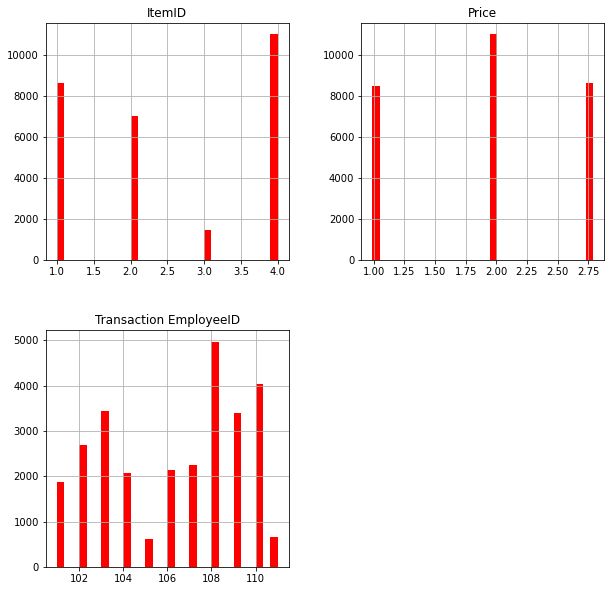

In [163]:
sales_data.hist(bins = 30, figsize = (10,10), color = 'r')

##### The Bar Chart below is showing that Burger is the most expensive item followed by shake and fry. 

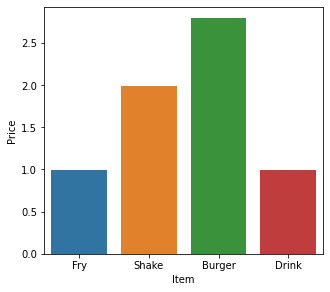

In [164]:
plt.figure(figsize = [5,10])

plt.subplot(211)
sns.barplot(x = 'Item', y = 'Price', data = sales_data)

In [176]:
#changling the PRICE column to Sale for convinience. 
df = sales_data.rename(columns = {'Price': 'Sale'})
df.head(5)

,Date,Time,Location,ItemID,Transaction EmployeeID,Employee Name,Item,Sale
0,1/17/2018,6:00:00 AM,Union Heights,2,101,Lebron James,Fry,0.99
1,4/6/2018,6:00:00 AM,Union Heights,2,102,Alec Pizza,Fry,0.99
2,1/30/2018,6:00:00 AM,Union Heights,4,102,Alec Pizza,Shake,1.99
3,4/10/2018,6:00:00 AM,State Street,2,106,Sheera Grayskull,Fry,0.99
4,3/28/2018,6:00:00 AM,Union Heights,4,102,Alec Pizza,Shake,1.99


###### We can see below that about 40% of the sales are Shakes followed by Burgers 

In [167]:
df.shape

(28132, 8)

In [168]:
item_percentage = df.Item.value_counts()/28132
item_percentage

Shake     0.391227
Burger    0.306804
Fry       0.249822
Drink     0.052147
Name: Item, dtype: float64

###### The below barchart is also showing the same percentage for all 4 items. We know from the dataset that Item 1 is Burger, 2 is Fry, 3 is Drink and item 4 is the Shake.

[Text(0, 0.5, 'Percent')]

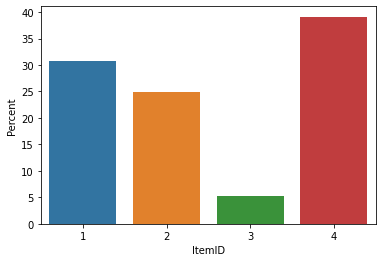

In [169]:
ax = sns.barplot( x = "ItemID", y = "ItemID", data = df, estimator=lambda x: len(x) / len(df) * 100)
ax.set(ylabel="Percent")

###### Grouping by location and found that State Street makes more revenue.

In [171]:
Location_Sale = df.groupby("Location")
Location_Sale.sum()

,ItemID,Transaction EmployeeID,Sale
Location,,,
State Street,40773,1753572,31398.78
Union Heights,30339,1235048,22993.70


###### Grouping by Transaction EmployeeID we can see below that State Street has more transactions as well. 

In [172]:
Location_Trans = df.groupby("Location")["Transaction EmployeeID"].value_counts()
Location_Trans

Location       Transaction EmployeeID
State Street   108                       4972
               110                       3449
               109                       3391
               107                       2247
               106                       2143
Union Heights  103                       3436
               102                       2699
               104                       2061
               101                       1872
               111                        656
               105                        610
               110                        596
Name: Transaction EmployeeID, dtype: int64

###### Let's separate the year, day and month and put it into a separate column

In [173]:
df["Year"] = pd.DatetimeIndex(df["Date"]).year
df["Month"] = pd.DatetimeIndex(df["Date"]).month
df["Day"] = pd.DatetimeIndex(df["Date"]).day
df.head(5)

,Date,Time,Location,ItemID,Transaction EmployeeID,Employee Name,Item,Sale,Year,Month,Day
0,1/17/2018,6:00:00 AM,Union Heights,2,101,Lebron James,Fry,0.99,2018,1,17
1,4/6/2018,6:00:00 AM,Union Heights,2,102,Alec Pizza,Fry,0.99,2018,4,6
2,1/30/2018,6:00:00 AM,Union Heights,4,102,Alec Pizza,Shake,1.99,2018,1,30
3,4/10/2018,6:00:00 AM,State Street,2,106,Sheera Grayskull,Fry,0.99,2018,4,10
4,3/28/2018,6:00:00 AM,Union Heights,4,102,Alec Pizza,Shake,1.99,2018,3,28


###### Let's take a look at the average sales per month and day from the charts below.
##### 'Groupby' works great by grouping all the data that share the same month column, then obtain the mean of the sales column  
##### It looks like sales peak is around February and March. As for the days, we can see that the peak is around 14, 23 and 29th of days. 

Text(0.5, 1.0, 'Average Sales Per Day')

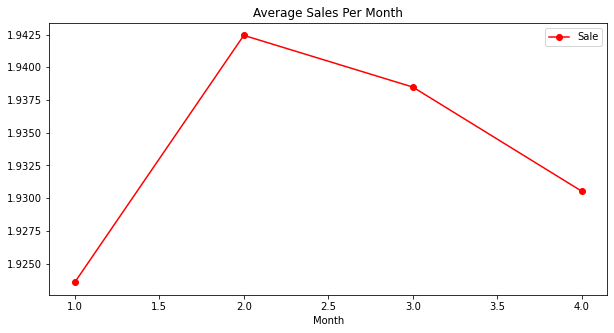

<Figure size 432x288 with 0 Axes>

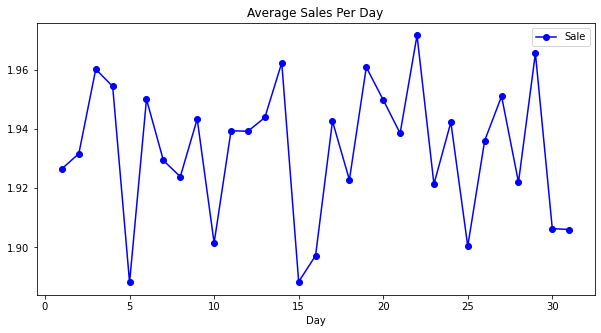

In [175]:
axis = df.groupby("Month")[["Sale"]].mean().plot(figsize = (10,5), marker = 'o', color = 'r' )
axis.set_title("Average Sales Per Month")

plt.figure()
axis = df.groupby("Day")[["Sale"]].mean().plot(figsize = (10,5), marker = 'o', color = 'b' )
axis.set_title("Average Sales Per Day")

###### The below grouping is showing that employee Charles Shwaybuck with Transaction Employee ID 108 has the highest transactions followed by Alex Jones and Mrs. Fancy Pants which could tell that they are possibly working more hours. 

In [145]:
grp = df.groupby(["Employee Name", "Location"])["Transaction EmployeeID"].value_counts()
print(grp)

Employee Name      Location       Transaction EmployeeID
Alec Pizza         Union Heights  102                       2699
Alex Jones         Union Heights  103                       3436
Charles Shwaybuck  State Street   108                       4972
Hulk Hogan         Union Heights  111                        656
Jeralyn Peterson   State Street   107                       2247
John Wayne         Union Heights  104                       2061
Lebron James       Union Heights  101                       1872
Mr. Peabody        State Street   109                       3391
Mrs. Fancy Pants   State Street   110                       3449
                   Union Heights  110                        596
Sheera Grayskull   State Street   106                       2143
Stacy Smith        Union Heights  105                        610
Name: Transaction EmployeeID, dtype: int64


### TASK 3. CONCLUSION, INSIGHTS AND WHAT I COULD DO DIFFERENTLY. 

- SHAKES ARE THE MOST POLULAR ITEMS AND MAKES 40% THE SALE
-  STATESTREET IS THE BUSIEST LOCATION AND BRINGS MORE REVENUE. 
- APRIL AND MARCH ARE THE PEAK MONTH FOR SALE. 
- THE BUSIEST DAYS ARE AROUND 23RD AND 29TH.
- EMPLOYEES WITH TRANSACTION ID # 108, 103 and 110 MOST LIKELY WORK MORE HOURS. 
- ALTHOUGH I COULD NOT FIND THE RIGHT CODE TO FIND THE NUMBER OF COMBOS SALES IN APRIL,  MORE RESEARCH AND TIME WOULD HELP ME TO FIND IT BY USING EXCELL VLOOKUP FUNCTIONS OR SQL FILTERING.    